# 3 варіант
Вагін Олександр Вікторович

$$ a = 0.9, b = 0.2, c = 0.6, \eta = 0.4$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt

a, b, c, eta = 0.9, 0.2, 0.6, 0.4

r = np.array([a, b]).T

R = np.array([[1, c], [c, 1]])

sigma = 1

In [27]:
def cost_fn(sigma, r, weights, R):
    return 0.5 * sigma**2 - np.dot(r.T, weights) + 0.5*np.dot(np.dot(weights.T, R), weights)

In [28]:
def gradient_descent(sigma, r, R, eta, num_iterations=1000, tolerance=1e-7, patience=50):
    num_features = r.shape[0]
    weights = np.zeros((num_features, ))
    
    weights_list = [weights]
    cost_result = [cost_fn(sigma, r, weights, R)]
    prev_cost = cost_result[0]
    
    early_stop_counter = 0 # лічильник для раннбої зупинки
    
    for i in range(num_iterations):
        # розраховуємо градієнт
        gradient = np.dot(R, weights) - r

        # обновляємо ваги
        weights = weights - eta * gradient
        weights_list.append(weights)
        
        # Розраховуємо нове значення функції варторсті
        cost = cost_fn(sigma, r, weights, R)
        cost_result.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
            
        if np.abs(cost - prev_cost) < tolerance:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping at iteration", i)
                break
        
        prev_cost = cost
    return weights_list, cost_result

In [29]:
weights, cost = gradient_descent(sigma, r, R, eta)
print("Optimized weights:")
print(weights[-1])

Iteration 0: Cost = 0.24527999999999994
Early stopping at iteration 89
Optimized weights:
[ 1.21874987 -0.53124987]


In [30]:
cost[-1]

0.0046875000000071165

In [31]:
def f(x, y):
    return 0.5*sigma**2 - a*x - b*y+ 0.5*(x**2 + 2*c*x*y + y**2)

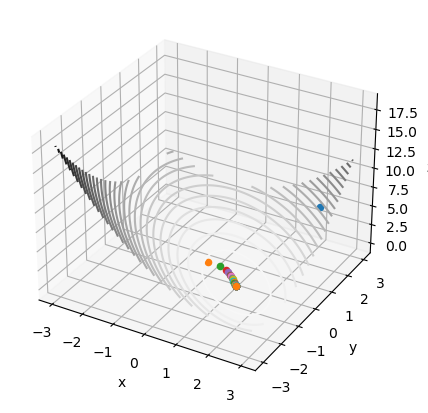

In [32]:
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection = '3d')

ax.scatter(2,3,4)
for x,y in weights:
    ax.scatter(x, y, f(x,y))

ax.contour3D(X, Y, Z, 30, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

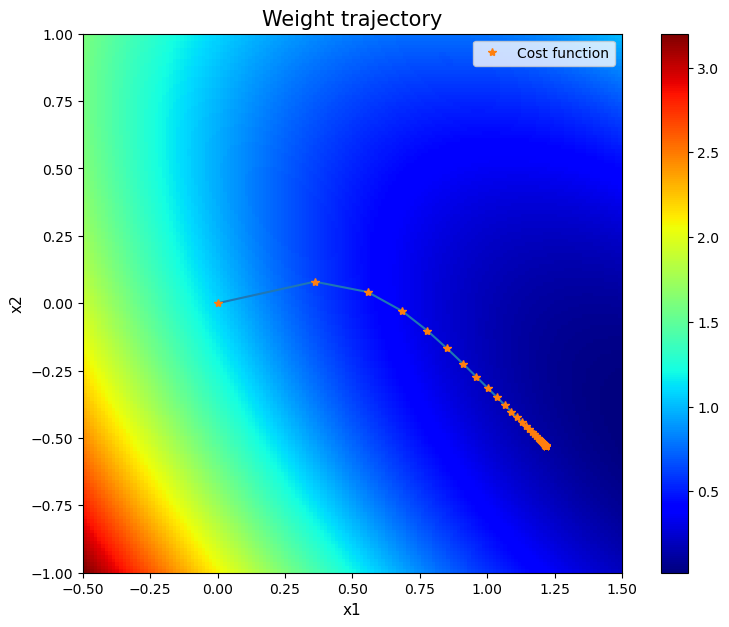

In [33]:
x1 = np.linspace(-1, 1, 150)
x2 = np.linspace(-1, 1, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10, 7))
plt.imshow(Z, extent = [-0.5,1.5,-1,1], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Weight trajectory", fontsize=15)
plt.plot(np.array(weights)[:,:1], np.array(weights)[:,1:])
plt.plot(np.array(weights)[:,:1], np.array(weights)[:,1:], '*', label = "Cost function")

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

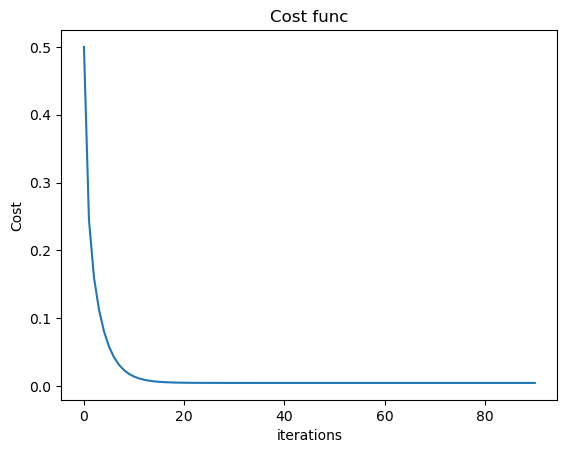

In [34]:
plt.plot(cost)

plt.xlabel('iterations')
plt.ylabel('Cost')

plt.title('Cost func')

plt.show()

# $\eta$ при якій алгоритм не збігається


In [35]:
eta = 1.6

weights, cost = gradient_descent(sigma, r, R, eta)
print("Optimized weights:")
print(weights[-1])

Iteration 0: Cost = 0.50448
Iteration 100: Cost = 1.9398773128593965e+38
Iteration 200: Cost = 8.178881855557369e+76
Iteration 300: Cost = 3.4483679954256123e+115
Iteration 400: Cost = 1.4538957820739012e+154
Iteration 500: Cost = 6.129893758254119e+192
Iteration 600: Cost = 2.5844766833206846e+231
Iteration 700: Cost = 1.0896632127814784e+270
Iteration 800: Cost = inf
Iteration 900: Cost = inf
Optimized weights:
[-4.57974251e+192 -4.57974251e+192]


C:\Users\Kidma\AppData\Local\Temp\ipykernel_39128\1925304523.py:26: RuntimeWarning: invalid value encountered in double_scalars
  if np.abs(cost - prev_cost) < tolerance:


C:\Users\Kidma\AppData\Local\Temp\ipykernel_39128\3187813888.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*sigma**2 - a*x - b*y+ 0.5*(x**2 + 2*c*x*y + y**2)


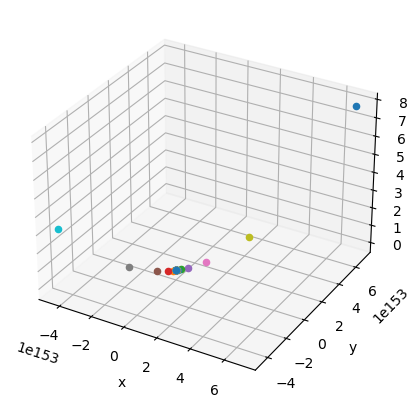

In [36]:
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection = '3d')

ax.scatter(2,3,4)
for x,y in weights:
    ax.scatter(x, y, f(x,y))

ax.contour3D(X, Y, Z, 30, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

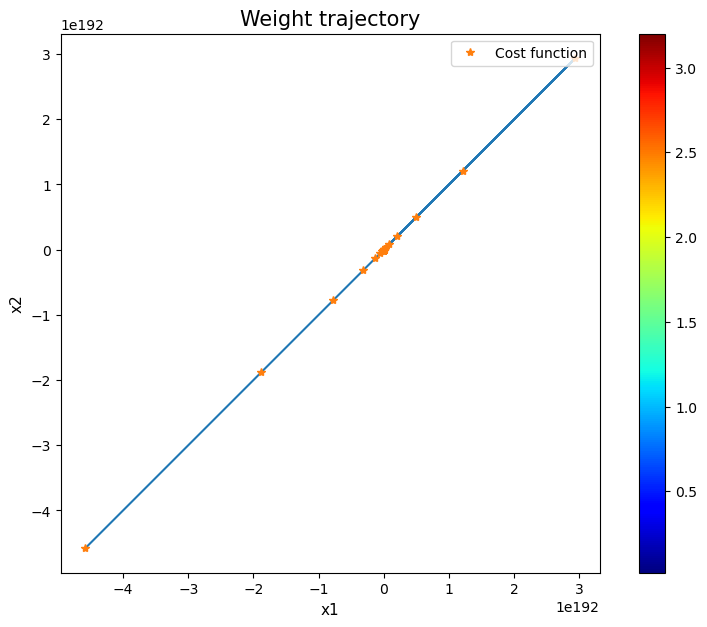

In [37]:
x1 = np.linspace(-1, 1, 150)
x2 = np.linspace(-1, 1, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10, 7))
plt.imshow(Z, extent = [-0.5,1.5,-1,1], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Weight trajectory", fontsize=15)
plt.plot(np.array(weights)[:,:1], np.array(weights)[:,1:])
plt.plot(np.array(weights)[:,:1], np.array(weights)[:,1:], '*', label = "Cost function")

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

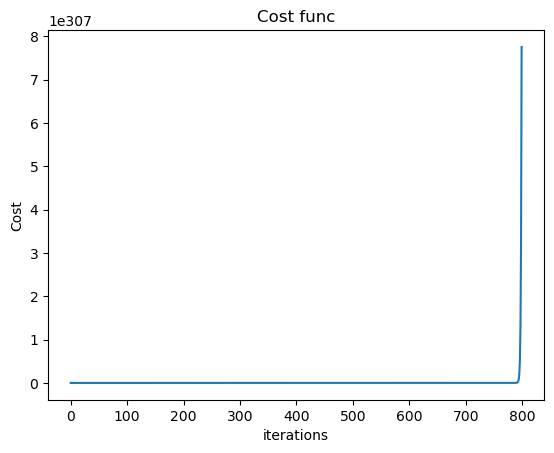

In [39]:
plt.plot(cost)

plt.xlabel('iterations')
plt.ylabel('Cost')

plt.title('Cost func')

plt.show()

Як ми бачимо алгоритм дуже сильно розійшовся при eta = 1.6, на саме тому значенні яке ми розрахували